<a href="https://colab.research.google.com/github/russellelliott/PythonChess/blob/main/Moving_Pieces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Making Moves

https://www.reddit.com/r/ComputerChess/comments/m1nm70/somebody_that_knows_pythonchess/
https://stackoverflow.com/questions/66557923/legal-user-moves-with-python-chess

Promoting a pawn
https://stackoverflow.com/questions/66571405/how-to-promote-a-pawn

Library documentation
https://python-chess.readthedocs.io/en/latest/

Game Outcome
https://github.com/niklasf/python-chess/issues/803

Time delay
https://realpython.com/python-sleep/

In [2]:
pip install CairoSVG

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 45 kB 3.8 MB/s 
     |████████████████████████████████| 88 kB 9.5 MB/s 
  Created wheel for cairocffi: filename=cairocffi-1.3.0-py3-none-any.whl size=89668 sha256=beca11e23664f6bd5a9b7ee35dabedd7f063168f0f176fe074171bc4e4afdf1a
  Stored in directory: /root/.cache/pip/wheels/4e/ca/e1/5c8a9692a27f639a07c949044bec943f26c81cd53d3805319f
Successfully built cairocffi


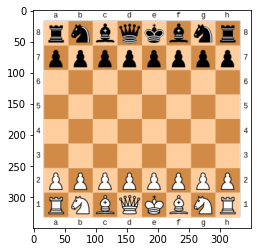

white
make a legal move: a2a4


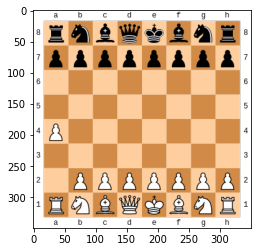

black
make a legal move: b7b5


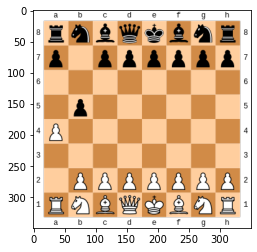

white
make a legal move: enogh


ValueError: ignored

In [9]:
import chess
import chess.svg
from cairosvg import svg2png
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#display the board as a png on matplotlib
def displayBoard(board):
    svg = chess.svg.board(board, size=350) #make the svg
    svg2png(bytestring=svg,write_to='output.png') #convert to png
    img = mpimg.imread('output.png')
    imgplot = plt.imshow(img)
    plt.show() #show the png


board = chess.Board()
#print(board.unicode())

#function to check whose turn it is
def getTurn(board):
    #True = white, False = black
    if(board.turn):
        return("white")
    return("black")

#function that allows a human player to make a move
def human(board):
    displayBoard(board) #display the board after every turn
    #board.turn = True #can set the turn of the board; useful for progressive chess
    print(getTurn(board))
    moveInput = input("make a legal move: ")
    move = chess.Move.from_uci(moveInput) #make the move
    if move in board.legal_moves: #if the move is legal
        board.push(move) #push the move
    elif chess.Move.from_uci(moveInput + "q") in board.legal_moves: #check if promotion
        moveInput += input("Which piece you want to promote the pawn to? [q,r,b,n]: ") #promotion query
        move = chess.Move.from_uci(moveInput) #make the move
        board.push(move) #push the move
    else:
        print("invalid move. try again")
    

while not board.is_game_over():
    #print(board.unicode())
    human(board)
    human(board)

#when the game is over, display why
print(board.outcome())

